In [98]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import re

In [56]:
df = pd.read_csv('./data/수산물_통합전처리_3컬럼.csv')

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37555 entries, 0 to 37554
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   어종      37555 non-null  object        
 1   산지      37555 non-null  object        
 2   규격      37555 non-null  object        
 3   포장      37555 non-null  object        
 4   수량      37555 non-null  object        
 5   중량      37555 non-null  float64       
 6   낙찰고가    37555 non-null  object        
 7   낙찰저가    37555 non-null  object        
 8   평균가     37555 non-null  object        
 9   파일어종    37555 non-null  object        
 10  year    37555 non-null  int64         
 11  month   37555 non-null  int64         
 12  date    37555 non-null  datetime64[ns]
 13  전처리     37555 non-null  object        
 14  품목명     37555 non-null  object        
 15  공통어종    37555 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(12)
memory usage: 4.6+ MB


In [76]:
# 평균가 열 결측치 제거 및 수치 변환
df['평균가'] = df['평균가'].str.replace(',', '').astype(float)

In [46]:
df=df.groupby('date')['평균가'].mean().to_frame().reset_index()

In [85]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000",110000.0,갈치,2021,1,2021-01-01,선,갈치,갈치
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000",141700.0,갈치,2021,1,2021-01-01,선,갈치,갈치
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000",99000.0,갈치,2021,1,2021-01-01,선,갈치,갈치
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000",138600.0,갈치,2021,1,2021-01-01,선,갈치,갈치
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000",200000.0,갈치,2021,1,2021-01-01,선,갈치,갈치
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500",8500.0,홍어,2024,12,2024-12-01,선,홍어,홍어
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500",4800.0,홍어,2024,12,2024-12-01,선,홍어,홍어
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000",3100.0,홍어,2024,12,2024-12-01,선,홍어,홍어
37553,(선)홍어,방어진,6미,kg,49,1.0,"4,000","4,000",4000.0,홍어,2024,12,2024-12-01,선,홍어,홍어


In [92]:
df[df['파일어종']=='조기'].groupby('date')['평균가'].mean()

date
2021-01-01    177560.576923
2021-02-01     91800.763359
2021-03-01    109651.937984
2021-04-01    119761.764706
2021-05-01     62529.166667
2021-06-01     44109.166667
2021-07-01     39411.494253
2021-08-01     59761.538462
2021-09-01    112134.482759
2021-10-01     91897.872340
2021-11-01     61412.820513
2021-12-01    104193.103448
2022-01-01    162673.493976
2022-02-01    136894.736842
2022-03-01    280478.313253
2022-04-01    128394.897959
2022-05-01     53245.967742
2022-06-01     43867.889908
2022-07-01     30994.366197
2022-08-01     74125.842697
2022-09-01     88758.974359
2022-10-01     96997.794118
2022-11-01    119014.743590
2022-12-01    175203.000000
2023-01-01    286018.965517
2023-02-01    263578.494624
2023-03-01    263123.076923
2023-04-01    118951.063830
2023-05-01     49518.446602
2023-06-01     46288.505747
2023-07-01     48424.657534
2023-08-01     74907.407407
2023-09-01    134951.304348
2023-10-01     75165.934066
2023-11-01    108125.862069
2023-12-01    2

In [83]:
df.groupby('파일어종')['평균가'].mean().to_frame().reset_index()

,파일어종,평균가
0,갈치,100182.401820
1,고등어,35319.054581
2,꽁치,43510.232558
3,넙치,15872.527985
4,대구,29872.333143
5,명태,40713.551402
6,바지락,29698.679472
7,오징어,53710.037917
8,우럭,29036.007463
9,전복,26286.708861


In [47]:
# 날짜를 Prophet용 ds 컬럼으로 변환
# 실제 날짜 컬럼이 있으면 그걸 ds로 이름 바꿈
df['ds'] = df['date']

# Prophet용 데이터 준비 (평균가 예측, 어종별 데이터 분리 가능)
prophet_df = df[['ds', '평균가']].rename(columns={'평균가':'y'})

# 4. 모델 학습
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(prophet_df)

# 5. 미래 예측 날짜 생성
future = model.make_future_dataframe(periods=12, freq='M')  # 향후 12개월 예측
forecast = model.predict(future)

# 결과 확인
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


12:58:31 - cmdstanpy - INFO - Chain [1] start processing
12:58:31 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat     yhat_lower     yhat_upper
55 2025-07-31   71668.066157   65580.874926   78579.805826
56 2025-08-31   91157.635615   84215.356271   97633.675111
57 2025-09-30   68327.636484   61570.640214   74825.950125
58 2025-10-31   67114.513568   60897.498505   73342.282903
59 2025-11-30  107061.598876  100812.111613  113391.895643


/opt/miniconda3/envs/yh/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


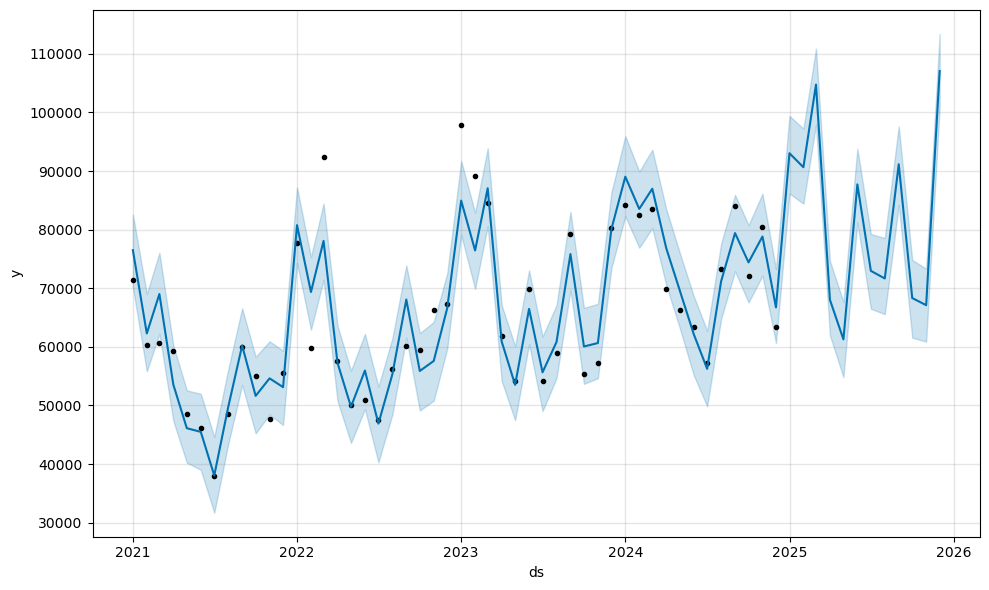

In [48]:
model.plot(forecast)
plt.show()

In [63]:
import joblib

In [65]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [49]:
df

,date,평균가,ds
0,2021-01-01,71409.612626,2021-01-01
1,2021-02-01,60266.077739,2021-02-01
2,2021-03-01,60666.715328,2021-03-01
3,2021-04-01,59304.016620,2021-04-01
4,2021-05-01,48478.632479,2021-05-01
5,2021-06-01,46072.178478,2021-06-01
6,2021-07-01,37944.027778,2021-07-01
7,2021-08-01,48564.392906,2021-08-01
8,2021-09-01,60032.824427,2021-09-01
9,2021-10-01,55039.205955,2021-10-01


### 외부변수 추가

In [93]:
df

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,year,month,date,전처리,품목명,공통어종
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000",110000.0,갈치,2021,1,2021-01-01,선,갈치,갈치
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000",141700.0,갈치,2021,1,2021-01-01,선,갈치,갈치
2,(선)갈치,목포,중,S/P,3,20.0,"110,000","77,000",99000.0,갈치,2021,1,2021-01-01,선,갈치,갈치
3,(선)갈치,목포,8미,S/P,25,20.0,"155,000","50,000",138600.0,갈치,2021,1,2021-01-01,선,갈치,갈치
4,(선)갈치,삼천포,중,S/P,2,20.0,"200,000","200,000",200000.0,갈치,2021,1,2021-01-01,선,갈치,갈치
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37550,(선)홍어,방어진,1미,kg,9.4,1.0,"8,500","8,500",8500.0,홍어,2024,12,2024-12-01,선,홍어,홍어
37551,(선)홍어,인천,중,kg,127.3,1.0,"5,000","4,500",4800.0,홍어,2024,12,2024-12-01,선,홍어,홍어
37552,(선)홍어,안흥,5/6미,kg,638.3,1.0,"3,500","3,000",3100.0,홍어,2024,12,2024-12-01,선,홍어,홍어
37553,(선)홍어,방어진,6미,kg,49,1.0,"4,000","4,000",4000.0,홍어,2024,12,2024-12-01,선,홍어,홍어


In [111]:
# 그룹화 함수 정의
def group_area(area):
    수입산 = ['중국', '세네갈', '베네수엘라', '오만', '필리핀', '모로코', '대만', '인도', '일본',
            '러시아', '미국', '베트남', '스코틀랜드', '영국', '바누아투', '아르헨티나', '페루',
            '스페인', '뉴질랜드', '에콰도르', '우루과이', '칠레', '호주']

    원양산 = ['(원양)러시아', '(원양)노르웨이', '(원양)포클랜드', '(원양)아르헨티나', '기타(원양)']

    국내산_주요 = ['제주도', '완도', '여수', '군산', '안흥', '통영', '태안', '삼천포', '나로도',
                 '남해', '속초', '포항', '부산(기장)', '신안', '대천', '장항', '서천', '대부도',
                 '서산', '사천', '고흥', '흑산도', '임원', '강구', '동해시', '축산', '후포',
                 '방어진', '고창', '감포', '죽변', '충무', '마산', '순천', '안면도', '당진',
                 '화성', '거진', '고성', '구룡포', '강화', '연평도', '대진', '부안', '영흥도',
                 '삼척', '울진', '주문진', '영덕']
    
    기타_국내 = ['목포', '기타(국내)']

    if area in 수입산:
        return '수입산'
    elif area in 원양산:
        return '원양산'
    elif area in 국내산_주요:
        return '국내산_주요'  # 주요 국내산은 개별 유지하거나 문자열로 반환 고민중
    elif area in 기타_국내:
        return '기타(국내)'
    else:
        return '기타'

# 데이터프레임 사용 시
df['산지_그룹화'] = df['산지'].apply(group_area)

In [95]:
def standardize_package(s):
    package = str(s).lower()
    # 박스 계열
    if package in ['s/p', 'box', 'c/s(상자)', 'ct/(bt)']:
        return '박스'
    elif 'kg' in package or 'g' in package or 'd/m' in package:
        return '중량'
    elif any(x in package for x in ['미', '손', '두름', '장', '봉지', '포', '망', '봉', '단', '가구', '펜']):
        return '개수/묶음'
    else:
        return '기타'

df['포장_분류'] = df['포장'].apply(standardize_package)

In [100]:
def parse_regulation(s):
    s = str(s).strip()
    # 범위+단위: 예) 350/450미
    match = re.match(r'^(\d+)[/](\d+)\s*([가-힣A-Za-z]+)$', s)
    if match:
        num1 = int(match.group(1))
        num2 = int(match.group(2))
        unit = match.group(3)
        return ((num1 + num2) / 2, unit)
    # 단위 없는 범위: 예) 350/450
    match = re.match(r'^(\d+)[/](\d+)$', s)
    if match:
        num1 = int(match.group(1))
        num2 = int(match.group(2))
        return ((num1 + num2) / 2, np.nan)
    # 숫자+단위: 예) 10미
    match = re.match(r'^(\d+)\s*([가-힣A-Za-z]+)$', s)
    if match:
        num = int(match.group(1))
        unit = match.group(2)
        return (num, unit)
    # 소,중,대 등 이미 등급명
    if s in ['소', '중', '대']:
        return (np.nan, s)
    return (np.nan, np.nan)


In [103]:
    
df[['규격_수치', '규격_단위']] = df['규격'].apply(lambda x: pd.Series(parse_regulation(x)))
df['규격_등급'] = df.apply(classify_size, axis=1)

In [102]:
def classify_size(row):
    fish = row['파일어종']
    value = row['규격_수치']
    unit = row['규격_단위']
    
    # 이미 등급형 단위면 그대로 반환
    if unit in ['소', '중', '대']:
        return unit

    # 어종별 미/코/g 등급 변환
    if fish == '명태':
        if unit == '미':
            if value >= 15: return '소'
            elif 8 <= value <= 14: return '중'
            elif value <= 7: return '대'
    elif fish == '고등어':
        if unit == '미':
            if value >= 20: return '소'
            elif 10 <= value <= 19: return '중'
            elif value <= 9: return '대'
    elif fish == '우럭':
        if unit == '미':
            if value >= 12: return '소'
            elif 7 <= value <= 11: return '중'
            elif value <= 6: return '대'
    elif fish == '갈치':
        if unit == '미':
            if value >= 12: return '소'
            elif 6 <= value <= 11: return '중'
            elif value <= 5: return '대'
    elif fish == '넙치':
        if unit == '미':
            if value >= 15: return '소'
            elif 8 <= value <= 14: return '중'
            elif value <= 5: return '대'
    elif fish == '오징어':
        if unit == '코':
            if value >= 30: return '소'
            elif 11 <= value <= 29: return '중'
            elif value <= 10: return '대'
    elif fish == '전복':
        if unit == '미':
            if value >= 15: return '소'
            elif 10 <= value <= 14: return '중'
            elif value <= 9: return '대'
    elif fish == '조기':
        if unit == '미':
            if value >= 20: return '소'
            elif 10 <= value <= 19: return '중'
            elif value <= 9: return '대'
    elif fish == '홍어':
        # 홍어 예시: 크기 정보 없으면 아래는 샘플
        if unit == '미':
            if value < 2: return '소'
            elif 2 <= value < 5: return '중'
            elif value >= 5: return '대'
    elif fish == '꽁치':
        if unit == '미':
            if value >= 40: return '소'
            elif 20 <= value <= 39: return '중'
            elif value <= 19: return '대'
    elif fish == '대구':
        if unit == '미':
            if value >= 12: return '소'
            elif 6 <= value <= 11: return '중'
            elif value <= 5: return '대'
    elif fish == '바지락':
        if unit == '미':
            if value < 30: return '소'
            elif 30 <= value <= 50: return '중'
            elif value > 50: return '대'
    return np.nan

# 적용 예시 (어종, 규격_수치, 규격_단위가 있는 DataFrame)
df['규격_등급'] = df.apply(classify_size, axis=1)


In [104]:
df.dropna(subset=['규격_등급'], inplace=True)

In [118]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32418 entries, 0 to 32417
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       32418 non-null  float64
 1   1       32418 non-null  float64
 2   2       32418 non-null  float64
 3   3       32418 non-null  float64
 4   4       32418 non-null  float64
 5   5       32418 non-null  float64
 6   6       32418 non-null  float64
 7   7       32418 non-null  float64
 8   8       32418 non-null  float64
 9   9       32418 non-null  float64
 10  10      32418 non-null  float64
 11  11      32418 non-null  float64
 12  12      32418 non-null  float64
 13  13      32418 non-null  float64
 14  14      32418 non-null  float64
 15  15      32418 non-null  float64
 16  16      32418 non-null  float64
 17  17      32418 non-null  float64
 18  18      32418 non-null  float64
 19  19      32418 non-null  float64
 20  20      32418 non-null  float64
 21  21      32418 non-null  float64
 22

In [108]:
df['수량'] = df['수량'].str.replace(',', '').astype(float)

In [109]:
df['date'] = pd.to_datetime(df['date'])

In [106]:
df.head(2)

,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,파일어종,...,month,date,전처리,품목명,공통어종,산지_그룹화,포장_분류,규격_수치,규격_단위,규격_등급
0,(선)갈치,목포,5미,S/P,1,15.0,"110,000","110,000",110000.0,갈치,...,1,2021-01-01,선,갈치,갈치,기타(국내),박스,5.0,미,대
1,(선)갈치,목포,10미,S/P,39,15.0,"200,000","30,000",141700.0,갈치,...,1,2021-01-01,선,갈치,갈치,기타(국내),박스,10.0,미,중


In [112]:
y = df['평균가']

In [114]:
X = df[['파일어종','산지_그룹화','규격_등급', '포장_분류','수량','중량']]

In [115]:
X.head(2)

,파일어종,산지_그룹화,규격_등급,포장_분류,수량,중량
0,갈치,기타(국내),대,박스,1.0,15.0
1,갈치,기타(국내),중,박스,39.0,15.0


In [119]:
ct = ColumnTransformer([('onehot', OneHotEncoder(), [0,1,2,3]),
                        ('scaler', MinMaxScaler(), [4,5])
                       ])

In [122]:
X_scaled = ct.fit_transform(X)

In [125]:
X_scaled

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 186890 stored elements and shape (32418, 26)>

In [131]:
dense_matrix = X_scaled.toarray()  # 밀집 행렬로 변환

# 데이터프레임으로 변환
df2 = pd.DataFrame(dense_matrix)

# 컬럼명이나 인덱스 지정이 필요하면 추가 설정 가능
# df.columns = ['feature1', 'feature2', ...]
# df.index = [...]

print(df.head())

    0    1    2    3    4    5    6    7    8    9   ...   16   17   18   19  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   

    20   21   22   23        24        25  
0  0.0  0.0  1.0  0.0  0.000000  0.083192  
1  0.0  0.0  1.0  0.0  0.000679  0.083192  
2  0.0  0.0  1.0  0.0  0.000036  0.111488  
3  0.0  0.0  1.0  0.0  0.000429  0.111488  
4  0.0  0.0  1.0  0.0  0.000018  0.111488  

[5 rows x 26 columns]


In [132]:
df2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.083192
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000679,0.083192
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000036,0.111488
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000429,0.111488
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000018,0.111488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000150,0.003962
32414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.002258,0.003962
32415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.011395,0.003962
32416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000858,0.003962


In [133]:
df2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.083192
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000679,0.083192
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000036,0.111488
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000429,0.111488
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000018,0.111488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000150,0.003962
32414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.002258,0.003962
32415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.011395,0.003962
32416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000858,0.003962
